# Part 1 : Football

## Preprocessing and EDA : 

In [335]:
import pandas as pd
import numpy as np

In [336]:
df = pd.read_csv("football.csv")
df.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [337]:
df.head(10)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal
5,m_147,p_118,open play,head,5.49,-1.50,1,0,low,40,15,missed chance
6,m_88,p_101,open play,head,14.46,-1.25,3,0,medium,88,8,missed chance
7,m_66,p_61,open play,head,8.98,4.99,1,0,low,10,29,missed chance
8,m_132,p_84,open play,left foot,23.44,-1.25,3,0,medium,58,45,blocked shot
9,m_99,p_30,open play,left foot,8.48,3.99,2,1,medium,43,55,blocked shot


In [338]:
df.isna().sum()

matchId                   0
playerId                  0
playType                  0
bodyPart                  0
x                         0
y                         0
interveningOpponents      0
interveningTeammates      0
interferenceOnShooter    34
minute                    0
second                    0
outcome                  34
dtype: int64

Unfortunately, we can find no evidence to predict the missing values, because we have no idea about the fixture's final result, and even if we do, it's either a goal or a missed chance (we don't even know it was a battle of which two teams). As the number of rows with missing values are relatively low, we can safely remove them from out dataset.

In [339]:
df.drop_duplicates(inplace=True)

In [340]:
df = df.dropna()

In [341]:
df['interveners'] = df['interveningOpponents'] + df['interveningTeammates']
# df = df.drop(['interveningOpponents', 'interveningTeammates'], axis= 1)

In [342]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,1
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,3
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,8
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,5
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,2


We add two new column called "distance" and "angle". It would give us an oomph analyzing the outcome based on distance and angle. I could remove the columns, "x" and "y", but they are going to serve their purpose in the future.

In [343]:
import numpy as np
import math
def get_angle(theta):
    if(np.arctan(theta) >= 0):
        return np.degrees(np.arctan(theta))
    else:
        return np.degrees(np.arctan(theta + math.pi))

df['distance'] = (df['x'] ** 2 + df['y'] ** 2) ** (0.5)
df['theta'] = 7.32*df['x'] / (df['distance'] ** 2 - 13.3956)
df['angle'] = df['theta'].apply(get_angle)
df = df.drop(['theta'], axis = 1)


In [344]:
df.head()


,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners,distance,angle
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,1,17.530810,18.544088
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,3,17.090313,13.982592
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,8,29.456534,14.153255
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,5,26.948560,15.458384
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,2,11.932141,31.315918


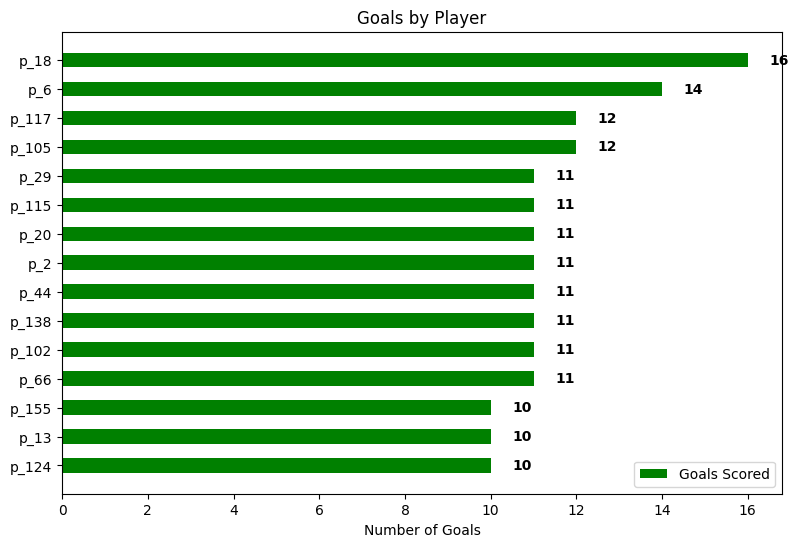

In [345]:
import matplotlib.pyplot as plt

player_stats = df.loc[df['outcome'] == 'goal'].groupby('playerId')['outcome'].count().reset_index()
player_stats.columns = ['playerId', 'goals_scored']
player_stats = player_stats.sort_values(by='goals_scored', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
top_players = player_stats.head(15)
player_ids = top_players['playerId'].tolist()

x = np.arange(len(player_ids))[::-1]
goals_bars = ax.barh(x, top_players['goals_scored'], color='green', height=bar_width, label='Goals Scored')
for bar, value in zip(goals_bars, top_players['goals_scored']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), va='center', fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels(player_ids)
ax.set_xlabel('Number of Goals')
ax.set_title('Goals by Player')
ax.legend()

plt.subplots_adjust(left=0.3)
plt.show()

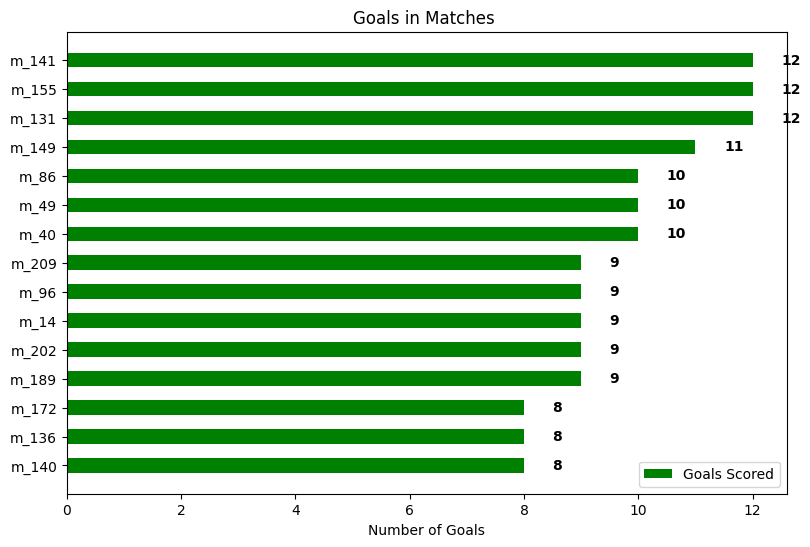

In [346]:
import matplotlib.pyplot as plt

match_stat = df.loc[df['outcome'] == 'goal'].groupby('matchId')['outcome'].count().reset_index()
match_stat.columns = ['matchId', 'goals_scored']
match_stat = match_stat.sort_values(by='goals_scored', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.5
top_matches = match_stat.head(15)
match_ids = top_matches['matchId'].tolist()

x = np.arange(len(match_ids))[::-1]

goals_bars = ax.barh(x, top_matches['goals_scored'], color='green', height=bar_width, label='Goals Scored')
for bar, value in zip(goals_bars, top_matches['goals_scored']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, str(value), va='center', fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels(match_ids)
ax.set_xlabel('Number of Goals')
ax.set_title('Goals in Matches ')
ax.legend()

# the spacing between bars
plt.subplots_adjust(left=0.3)

plt.show()

In [347]:
distances = df['distance'].sort_values(ascending=False)
distances.head()

7013    71.783221
4432    64.847711
6974    60.892618
3031    59.205683
1666    58.211343
Name: distance, dtype: float64

In [348]:
y = df['y'].sort_values(ascending=False)
y

1720    33.92
2160    33.92
2548    31.17
4300    29.68
8393    29.68
        ...  
7099   -30.92
7114   -32.42
2906   -33.92
802    -33.92
3988   -33.92
Name: y, Length: 8891, dtype: float64

In [349]:
y_upscale = (45 + (45 - 37)) / 45
df['y'] = (df['y'] + 33.92) * y_upscale

In [350]:
df_new = df.copy() 
df_new['outcome'] = df_new['outcome'].replace(['goal', 'own goal'], 'goal')
df_new['outcome'] = df_new['outcome'].replace(['missed chance', 'blocked shot', 'saved by keeper', 'hit the post'], 'missed')
goals = df_new[df_new['outcome'] == 'goal']
missed = df_new[df_new['outcome'] == 'missed']


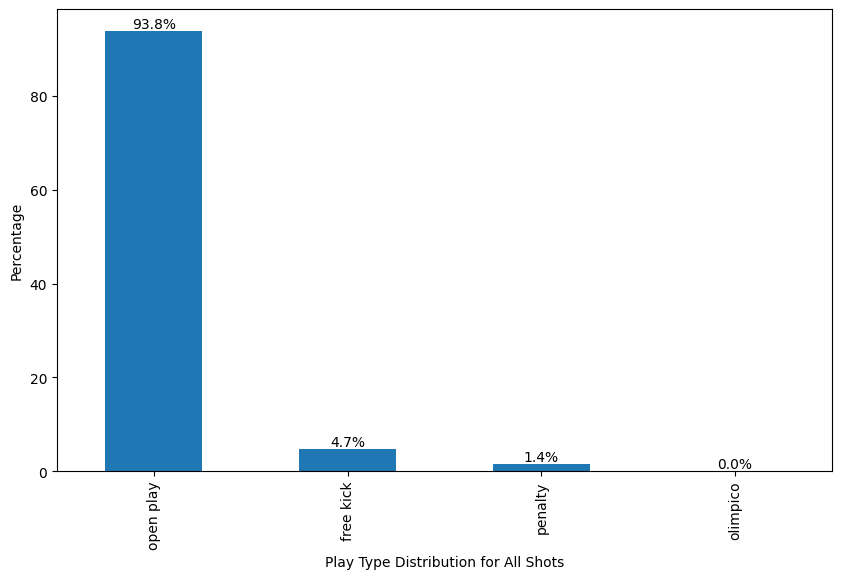

In [351]:
def play_type_percentage_plotter(df, title):
    play_type_counts = df['playType'].value_counts()

    total = len(df)

    play_type_percentage = (play_type_counts / total) * 100

    plt.figure(figsize=(10,6))
    bars = play_type_percentage.plot(kind='bar')
    plt.ylabel('Percentage')
    plt.xlabel(title)

    for rect in bars.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        
        label = "{:.1f}%".format(y_value)
        plt.text(x_value, y_value, label, ha='center', va='bottom')
        
    plt.show()

play_type_percentage_plotter(df, "Play Type Distribution for All Shots")
    

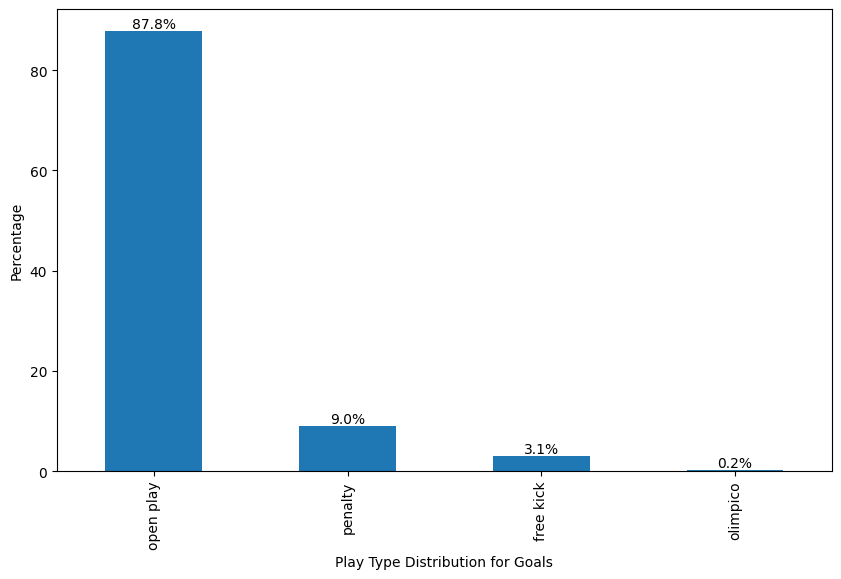

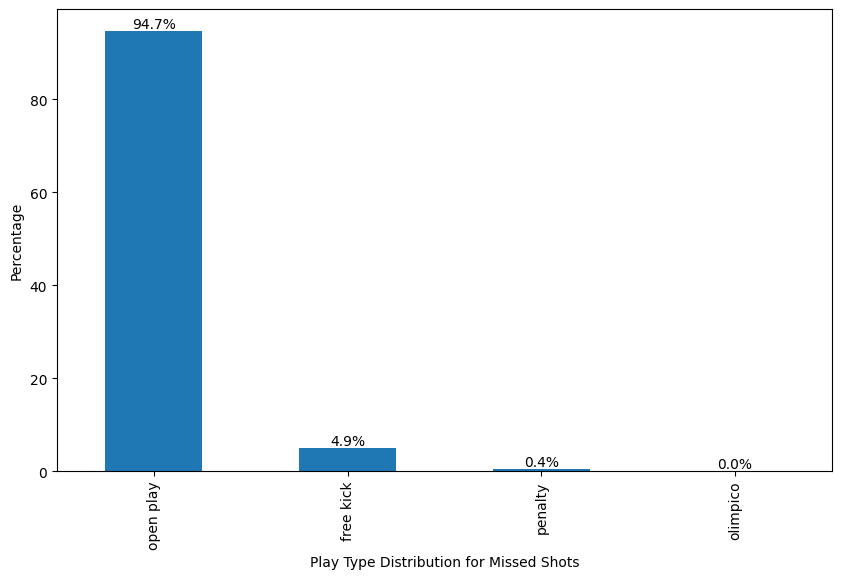

In [352]:
play_type_percentage_plotter(goals, "Play Type Distribution for Goals")
play_type_percentage_plotter(missed, "Play Type Distribution for Missed Shots")

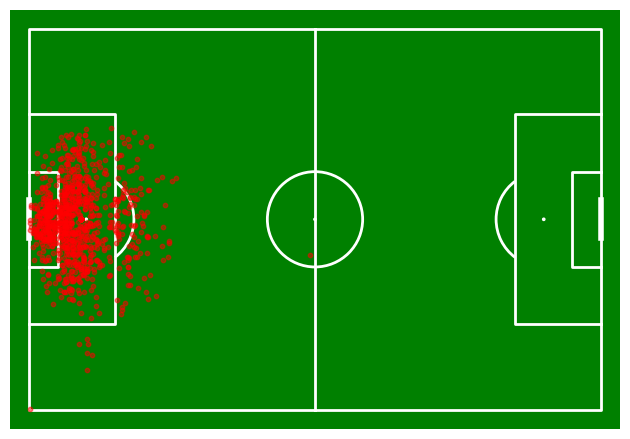

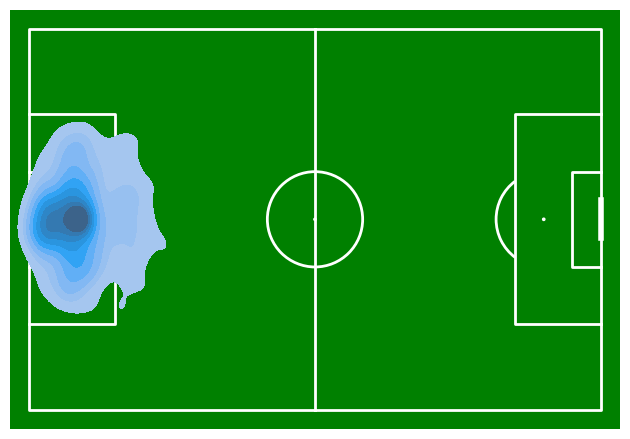

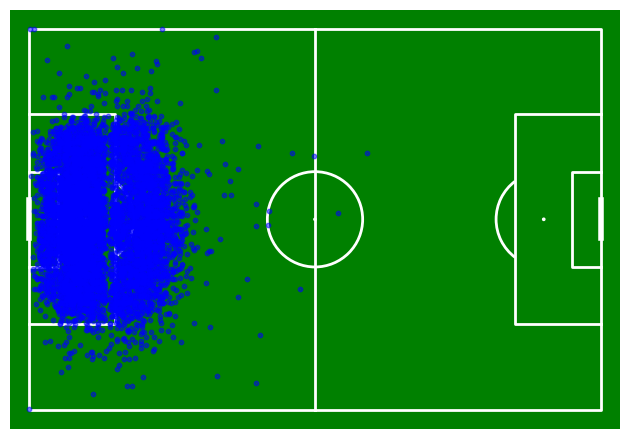

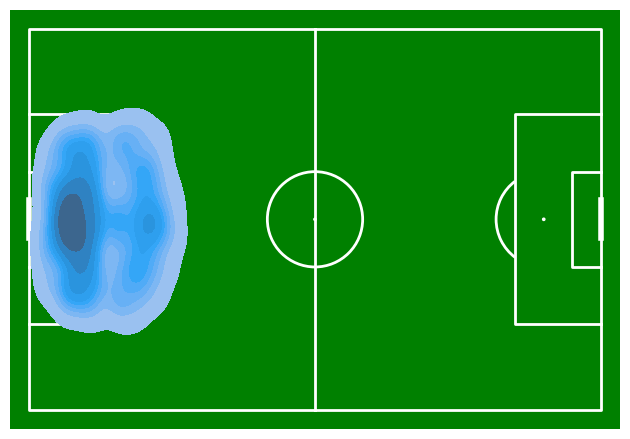

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from mplsoccer import Pitch

def draw_soccer_pitch(data, color = 'r'):
    pitch = Pitch(pitch_color='green', line_color='white', stripe=False)
    fig, ax = pitch.draw()    
    
    goals_x = data['x'].values
    goals_y = data['y'].values
    ax.scatter(goals_x, goals_y, s=10, c=color, alpha=0.5, label='Goals')
    plt.show()
    pitch = Pitch(pitch_color='green', line_color='white', stripe=False)
    fig, ax = pitch.draw() 
    sns.kdeplot(data, x='x', y='y', fill=True, palette='crest')
    plt.show()

draw_soccer_pitch(goals, 'red')

draw_soccer_pitch(missed, 'blue')


In [354]:
goaled_penalties = len(goals[goals['playType'] == 'penalty'])
missed_penalties = len(missed[missed['playType'] == 'penalty'])
total_penalties = len(df[df['playType'] == 'penalty'])

goaled_free_kicks = len(goals[goals['playType'] == 'free kick'])
missed_free_kicks = len(missed[missed['playType'] == 'free kick'])
total_free_kicks = len(df[df['playType'] == 'free kick'])

print("Total number of penalties: %d,\nMissed: %d [ %.2f %% ]      \nGoaled: %d [ %.2f %% ]" % (total_penalties, missed_penalties, (missed_penalties / total_penalties) * 100, goaled_penalties, (goaled_penalties / total_penalties) * 100))
print()
print("Total number of free kicks: %d,\nMissed: %d [ %.2f %% ]      \nGoaled: %d [ %.2f %% ]" % (total_free_kicks, missed_free_kicks, (missed_free_kicks / total_free_kicks) * 100, goaled_free_kicks, (goaled_free_kicks / total_free_kicks) * 100))

Total number of penalties: 126,
Missed: 29 [ 23.02 % ]      
Goaled: 97 [ 76.98 % ]

Total number of free kicks: 417,
Missed: 384 [ 92.09 % ]      
Goaled: 33 [ 7.91 % ]


In [355]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,interveners,distance,angle
0,m_91,p_103,open play,right foot,13.47,26.735556,1,0,medium,70,9,goal,1,17.530810,18.544088
1,m_17,p_16,open play,left foot,9.48,56.698222,3,0,medium,55,4,saved by keeper,3,17.090313,13.982592
2,m_111,p_88,free kick,left foot,29.43,38.478000,6,2,low,86,31,saved by keeper,8,29.456534,14.153255
3,m_142,p_87,open play,right foot,26.93,41.128000,4,1,medium,77,2,missed chance,5,26.948560,15.458384
4,m_117,p_9,open play,right foot,10.72,46.121778,2,0,medium,76,46,goal,2,11.932141,31.315918


### Adding new features

We are going to add multiple features to our dataset.
 - **Interveners**: Adding the value of interveningOpponents and interveningTeammates at each row
 
 - **Distance of the shot**: Adding the distance between where the ball shooted and the center of goal. The distance formula using coordinates $(x_1, y_1)$ and $(x_2, y_2)$ is:
 
 
 $ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $
 
 that the $(x_2, y_2)$ is the center of goal coordinates. In our data set it is (0, 0)
 
 - **Angle of the shot**: The second thing to consider when it comes to evaluating a shot is the view the player has of the goal: the more he or she can see, the better your chance of scoring.
 
 
 $tan(a) = \frac{7.32x}{x^2 + y^2 - \left(\frac{7.32}{2}\right)^2}$

In [356]:
interference_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_new = df.copy()
df_new['interferenceOnShooter'] = df_new['interferenceOnShooter'].map(interference_mapping)
df_new = pd.get_dummies(df_new, columns=['outcome', 'bodyPart', 'playType'], dtype=int)

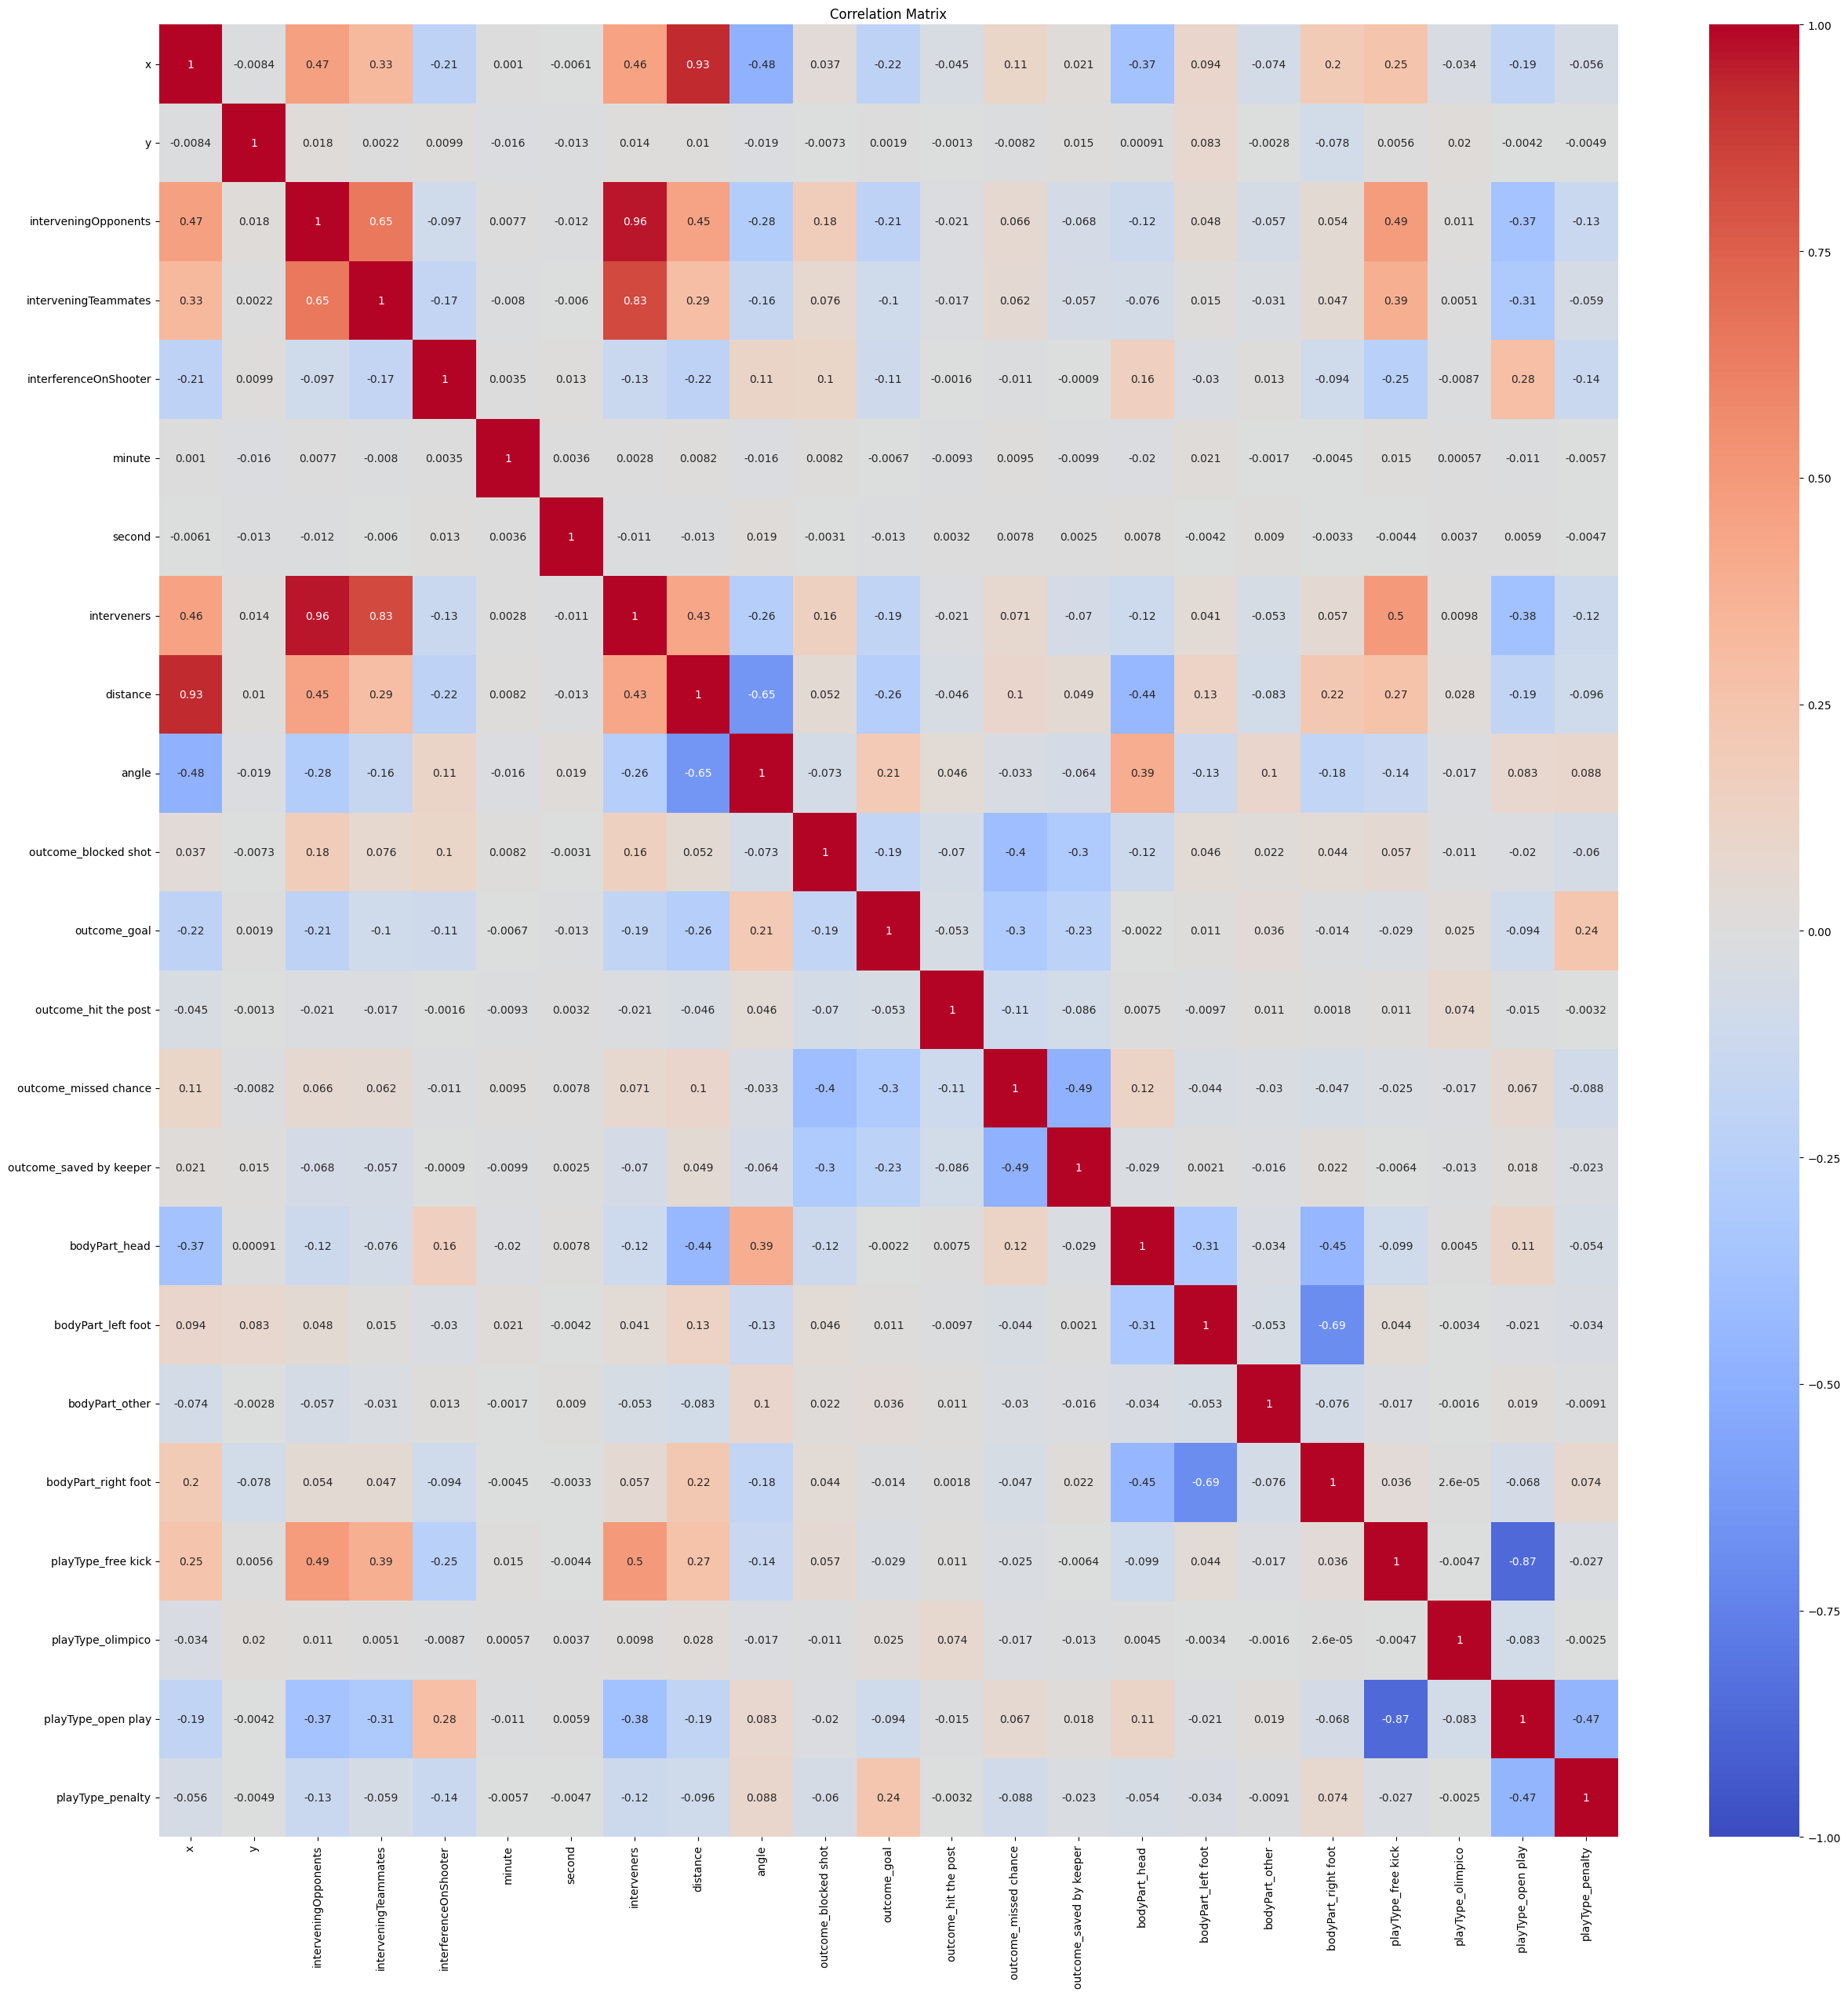

In [357]:
df_cleaned = df_new.drop(['matchId', 'playerId'], axis = 1)
plt.figure(figsize=(30, 30))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

In [358]:
df_backup = df.copy()
df['y'] = df['y'] - 33.92
df = df.drop(['distance', 'interveners', 'angle'], axis=1)


In [359]:
df_model = df.copy()
df_model.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-7.184444,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,22.778222,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,4.558000,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,7.208000,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,12.201778,2,0,medium,76,46,goal


## Training Models : 

Model accuracy: 41.8212478920742 %


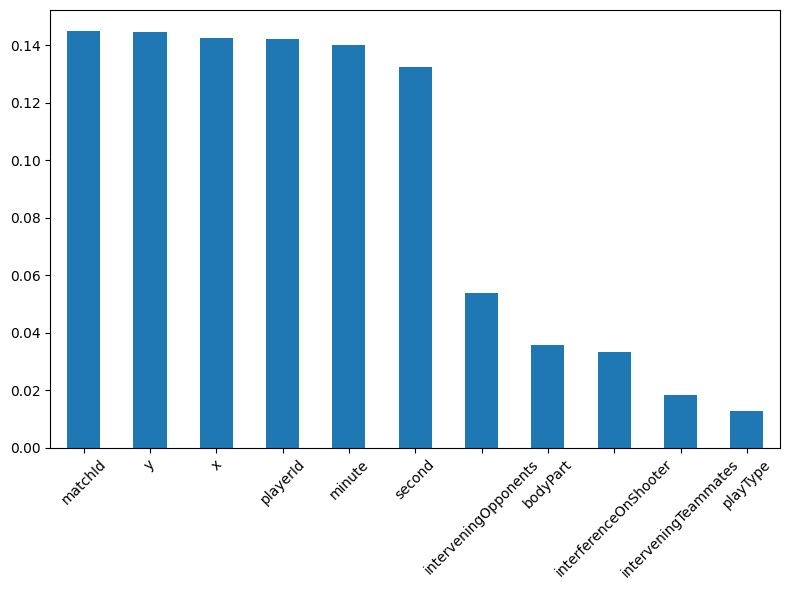

,Feature,Importance
0,matchId,0.144926
5,y,0.144491
4,x,0.142443
1,playerId,0.141947
9,minute,0.139994
10,second,0.132436
6,interveningOpponents,0.053742
3,bodyPart,0.035654
8,interferenceOnShooter,0.033274
7,interveningTeammates,0.018432


In [360]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def train_and_examine(df, test_size = 0.2):
    X = df.drop('outcome', axis=1)
    y = df['outcome']  

    le = LabelEncoder()
    for column in X.columns:
        if X[column].dtype == type(object):
            X[column] = le.fit_transform(X[column])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    model = RandomForestClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {accuracy * 100} %")
    importances = model.feature_importances_
    f_importances = pd.Series(importances, df.drop('outcome', axis = 1).columns)
    f_importances.sort_values(ascending=False, inplace=True)
    f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(8,6), rot=45)

    plt.tight_layout()
    plt.show()
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
    return feature_importance_df

feature_importance_df = train_and_examine(df_model)
feature_importance_df

In [361]:
df_model = df_backup.copy()
interference_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['interferenceOnShooter'] = df_model['interferenceOnShooter'].map(interference_mapping)
df_model = df_model.drop(['matchId', 'playerId', 'interveningOpponents', 'interveningTeammates', 'second', 'minute', 'playType', 'bodyPart', 'y', 'x'], axis = 1)
df_model['outcome'] = df_model['outcome'].map({'goal': 2, 'missed chance': 1, 'blocked shot': 0, 'hit the post': 1, 'saved by keeper': 0})
df_model

,interferenceOnShooter,outcome,interveners,distance,angle
0,1,2,1,17.530810,18.544088
1,1,0,3,17.090313,13.982592
2,0,0,8,29.456534,14.153255
3,1,1,5,26.948560,15.458384
4,1,2,2,11.932141,31.315918
...,...,...,...,...,...
8920,2,1,3,7.609895,46.818116
8921,1,0,5,23.158484,16.713121
8922,1,1,3,12.400746,31.970470
8923,2,1,1,9.524222,31.529506


Model accuracy: 46.711635750421586 %


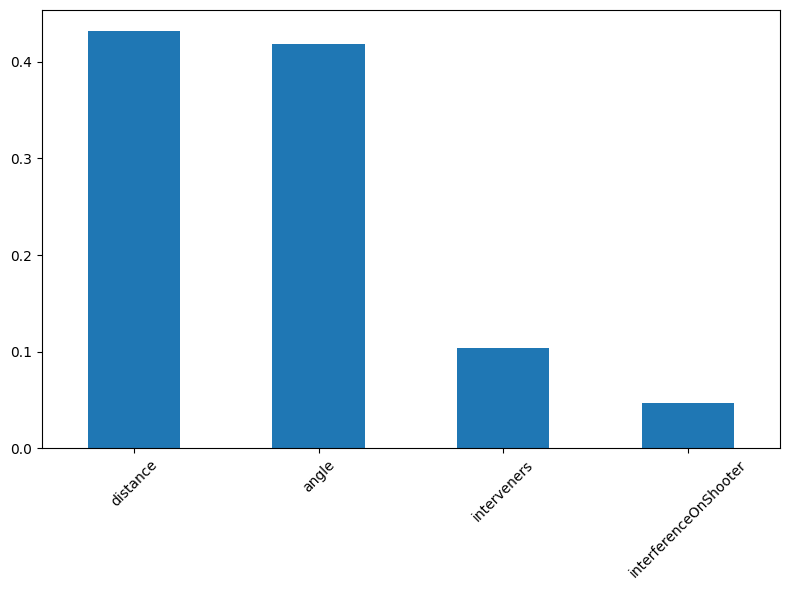

,Feature,Importance
2,distance,0.432016
3,angle,0.418229
1,interveners,0.103223
0,interferenceOnShooter,0.046532


In [362]:
feature_importance_df = train_and_examine(df_model)
feature_importance_df

In [363]:
df_model = df_backup.copy()
interference_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_model['interferenceOnShooter'] = df_model['interferenceOnShooter'].map(interference_mapping)
df_model = df_model.drop(['matchId', 'playerId', 'interveningOpponents', 'interveningTeammates', 'second', 'minute', 'playType', 'bodyPart', 'y', 'x'], axis = 1)
df_model['outcome'] = df_model['outcome'].map({'goal': 1, 'missed chance': 0, 'blocked shot': 0, 'hit the post': 0, 'saved by keeper': 0})
df_model

,interferenceOnShooter,outcome,interveners,distance,angle
0,1,1,1,17.530810,18.544088
1,1,0,3,17.090313,13.982592
2,0,0,8,29.456534,14.153255
3,1,0,5,26.948560,15.458384
4,1,1,2,11.932141,31.315918
...,...,...,...,...,...
8920,2,0,3,7.609895,46.818116
8921,1,0,5,23.158484,16.713121
8922,1,0,3,12.400746,31.970470
8923,2,0,1,9.524222,31.529506


Model accuracy: 86.3406408094435 %


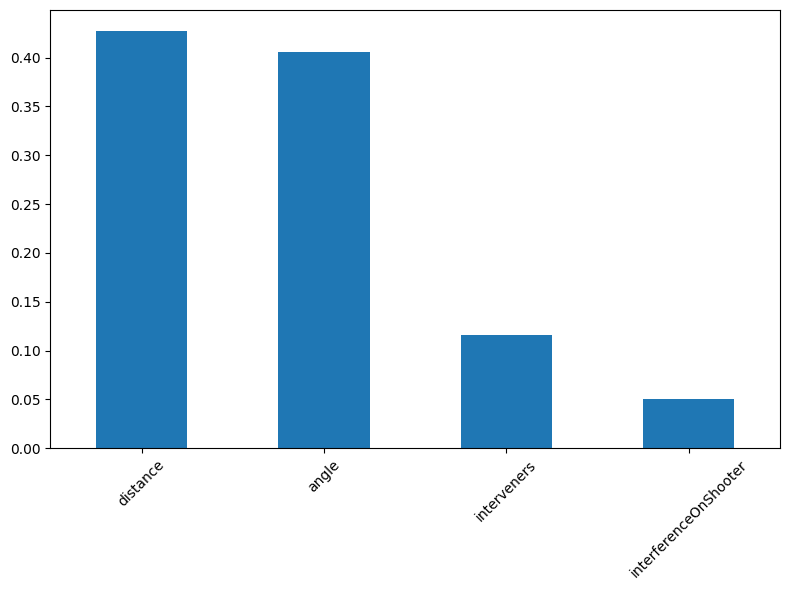

,Feature,Importance
2,distance,0.427411
3,angle,0.406136
1,interveners,0.116040
0,interferenceOnShooter,0.050414


In [364]:
feature_importance_df = train_and_examine(df_model)
feature_importance_df

# 2. Multivariate Regression Implementation

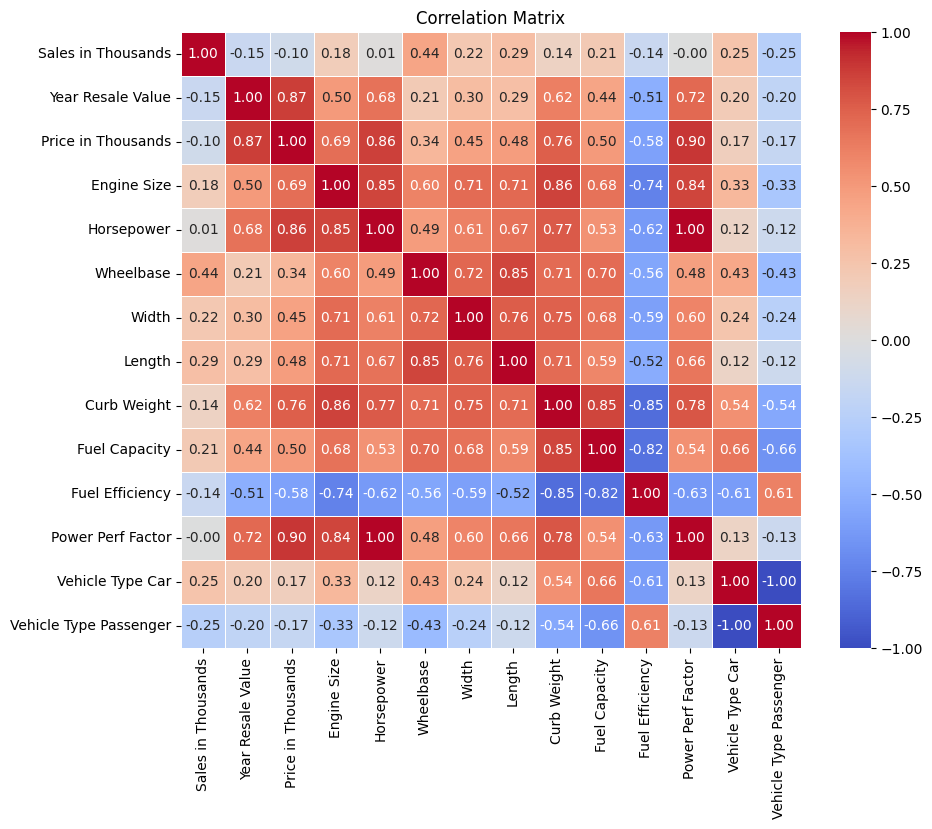

In [365]:
data = pd.read_csv('cars.csv')

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


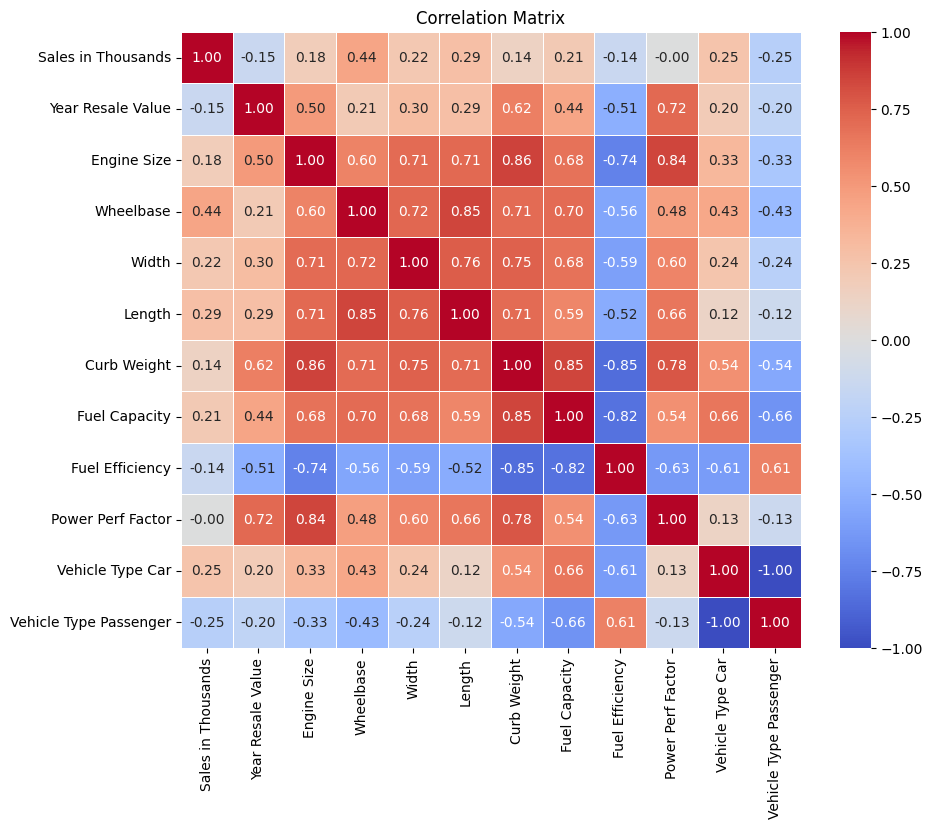

In [366]:
correlation_matrix = data.drop(columns=["Price in Thousands", "Horsepower"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [367]:
from sklearn.metrics import mean_squared_error, r2_score

def train_model(X, y, alpha, iterations,random_state):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X = np.hstack((np.ones((len(y), 1)), X))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    theta = np.zeros((X_train.shape[1], y_train.shape[1]))
    theta, cost_history = gradient_descent(X_train, y_train, theta, alpha, iterations)
    predictions = X_test.dot(theta)
    
    return theta, cost_history, y_test, predictions

def plot_results(theta, cost_history, y_test, predictions, target_names):
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    
    print("Mean Squared Error on Test Set:", mse)
    print("R-squared Score on Test Set:", r_squared)

    plt.plot(cost_history)
    plt.title('Cost History')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

    plt.figure(figsize=(12, 6))
    for i in range(y_test.shape[1]):
        plt.subplot(1, 2, i+1)
        plt.scatter(y_test[:, i], predictions[:, i])
        plt.plot([min(y_test[:, i]), max(y_test[:, i])], [min(y_test[:, i]), max(y_test[:, i])], color='red', linestyle='--')
        plt.title(f'Actual vs Predicted  - {target_names[i]}')
        plt.xlabel(f'Actual {target_names[i]}')
        plt.ylabel(f'Predicted {target_names[i]}')
    plt.show()

def compute_cost(X, y, theta):
    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta = theta - (alpha / m) * X.T.dot(X.dot(theta) - y)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

Mean Squared Error on Test Set: 3.6467183050660408
R-squared Score on Test Set: 0.9618676371892088


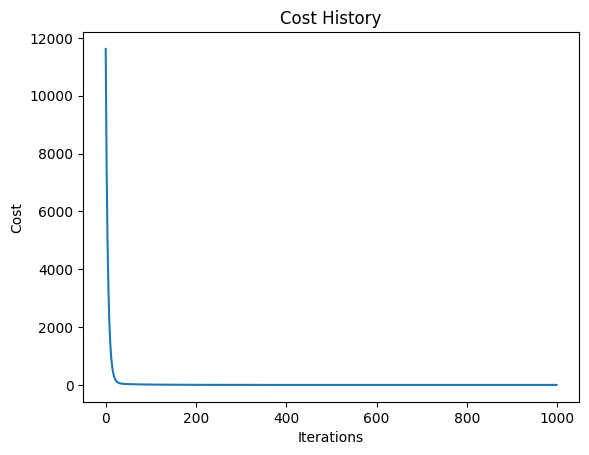

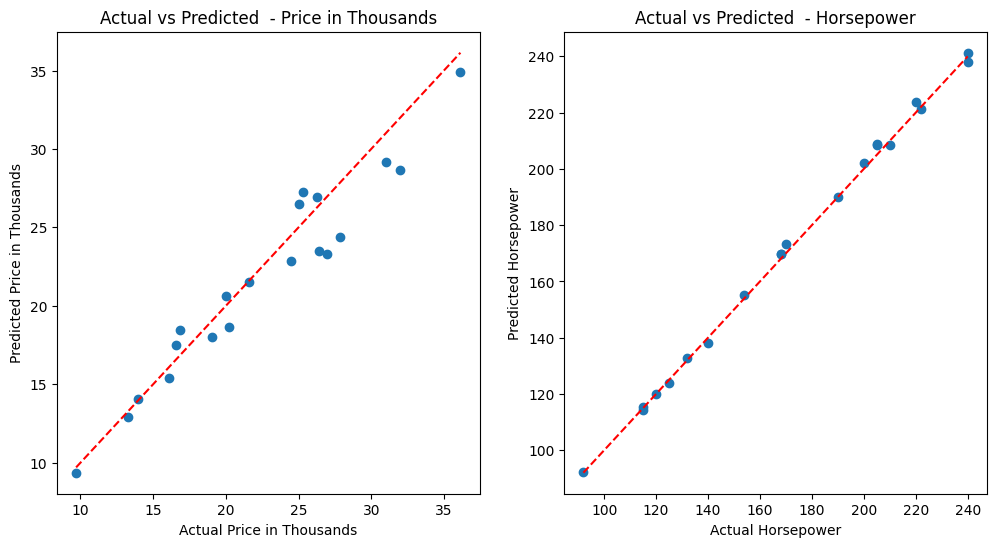

In [368]:
data = pd.read_csv('cars.csv')

X = data.drop(columns=["Price in Thousands", "Horsepower"])
y = data[["Price in Thousands", "Horsepower"]].values
target_names = ["Price in Thousands", "Horsepower"]
alpha = 0.1
iterations = 1000

theta, cost_history, y_test, predictions = train_model(X, y, alpha, iterations,random_state=555)
plot_results(theta, cost_history, y_test, predictions, target_names)

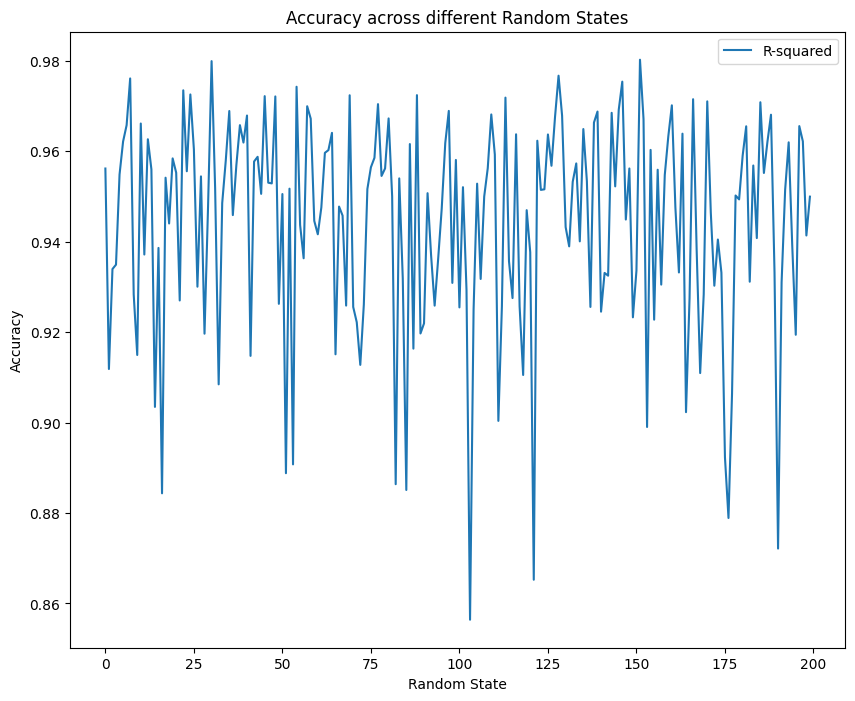

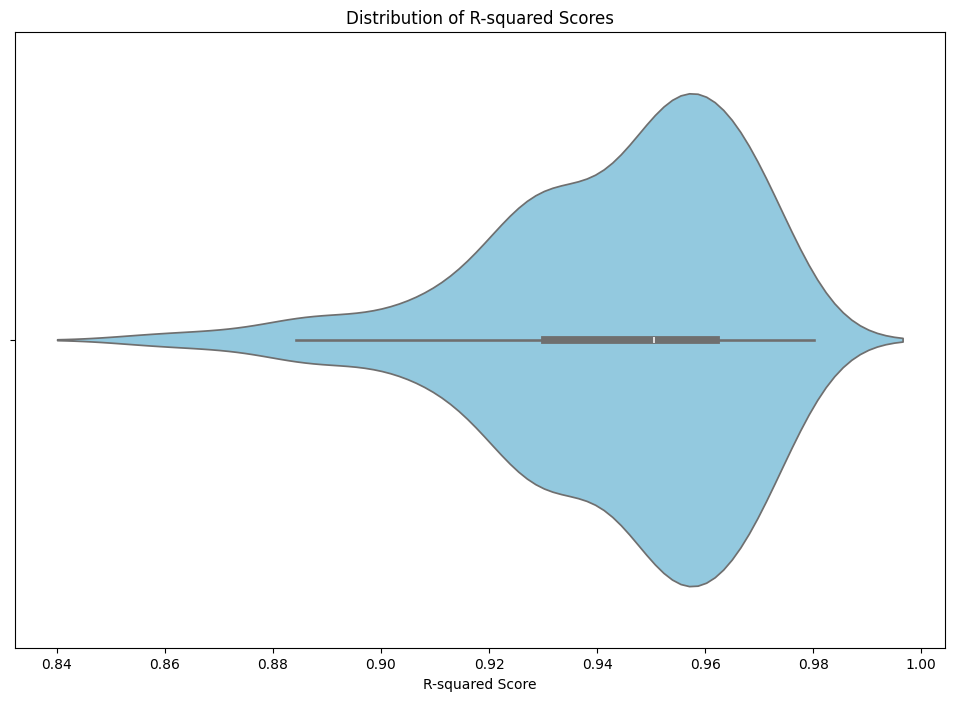

In [369]:
def compute_accuracy(X, y, random_state):
    theta, _, y_test, predictions = train_model(X, y, alpha=0.1, iterations=1000,random_state=random_state)  
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    return mse, r_squared


random_states = range(200)  
mse_scores = []
r_squared_scores = []

for random_state in random_states:
    mse, r_squared = compute_accuracy(X, y, random_state)
    mse_scores.append(mse)
    r_squared_scores.append(r_squared)

plt.figure(figsize=(10, 8))
plt.plot(random_states, r_squared_scores, label='R-squared')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.title('Accuracy across different Random States')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x=r_squared_scores, color='skyblue', orient='h')
plt.title('Distribution of R-squared Scores')
plt.xlabel('R-squared Score')
plt.show()


# 3.Manual K-Fold Cross Validation Implementation

In [370]:
def k_fold_cross_validation(X, y, k, alpha, iterations):
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    X = np.hstack((np.ones((len(y), 1)), X))

    m = len(y)
    fold_size = m // k
    validation_costs = []

    for i in range(k):
        start = i * fold_size
        end = start + fold_size

        X_train = np.concatenate([X[:start], X[end:]])
        y_train = np.concatenate([y[:start], y[end:]])

        X_val = X[start:end]
        y_val = y[start:end]

        theta = np.zeros((X.shape[1], 1))
        theta, _ = gradient_descent(X_train, y_train, theta, alpha, iterations)

        val_cost = compute_cost(X_val, y_val, theta)
        print(val_cost)
        validation_costs.append(val_cost)

    return theta, np.mean(validation_costs)

alpha = 0.1
iterations = 1000
k = 10


data = pd.read_csv('cars.csv')
X = data.drop(columns=["Price in Thousands", "Horsepower"])
y = data[["Price in Thousands", "Horsepower"]].values

theta, mean_validation_cost = k_fold_cross_validation(X, y, k, alpha, iterations)
print("Mean validation cost:", mean_validation_cost)

7.4930659076006165
4.034887096453635
9.985186478607696
13.478244612873993
7.531179640903028
4.5231008884214585
1.6476082869883206
6.267475421112762
1.3871621772905682
2.7405999921516764
Mean validation cost: 5.908851050240375


# 4. Comparison with Built-in Python Libraries

### Multivariate Regression

In [371]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv('cars.csv')

X = data.drop(columns=["Price in Thousands", "Horsepower"])
y = data[["Price in Thousands", "Horsepower"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=555)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


Mean Squared Error using sklearn: 3.648478473310001
R-squared using sklearn: 0.9619111527557871


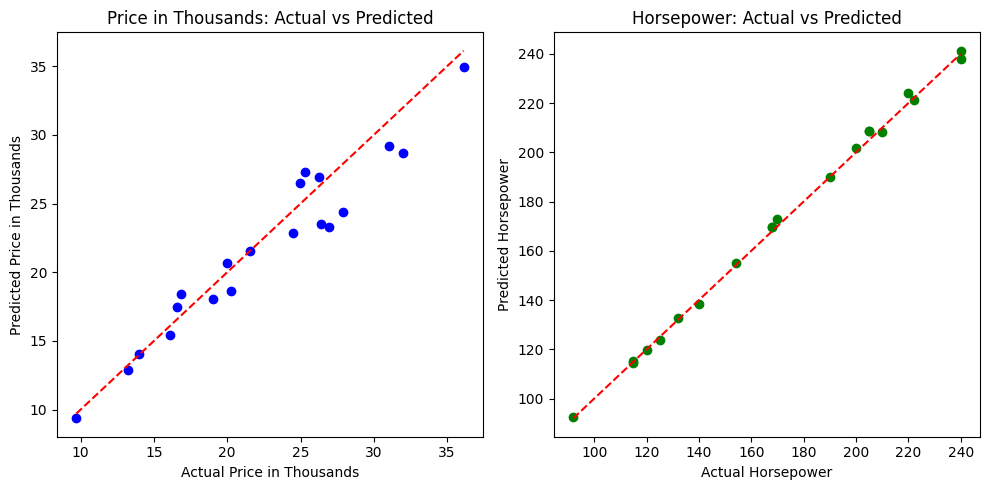

In [372]:
print("Mean Squared Error using sklearn:", mse)
print("R-squared using sklearn:", r_squared)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test["Price in Thousands"], y_pred[:, 0], color='blue')
plt.plot([min(y_test["Price in Thousands"]), max(y_test["Price in Thousands"])], 
         [min(y_test["Price in Thousands"]), max(y_test["Price in Thousands"])], 
         color='red', linestyle='--')
plt.xlabel("Actual Price in Thousands")
plt.ylabel("Predicted Price in Thousands")
plt.title("Price in Thousands: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test["Horsepower"], y_pred[:, 1], color='green')
plt.plot([min(y_test["Horsepower"]), max(y_test["Horsepower"])], 
         [min(y_test["Horsepower"]), max(y_test["Horsepower"])], 
         color='red', linestyle='--')
plt.xlabel("Actual Horsepower")
plt.ylabel("Predicted Horsepower")
plt.title("Horsepower: Actual vs Predicted")

plt.tight_layout()
plt.show()


### K fold cross validation comparaion


In [373]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')

cv_scores = -cv_scores

mean_cv_score_sklearn = np.mean(cv_scores)
print(f'Mean validation error using scikit-learn:" {mean_cv_score_sklearn:.10f}')

print("Mean validation error using custom implementation:", mean_validation_cost)

Mean validation error using scikit-learn:" 5.9111639620
Mean validation error using custom implementation: 5.908851050240375


# Questions

### **1. Strategies for Missing Values and Category Features**
For missing values, we chose to drop the entry, because there were only 34 rows with missing values, which is not even 1% of the dataset. 
We added three new features described above: 
- **Distance** which is the distance of the ball from the goal
- **Angle** which gives infoormation about with what angle from the goal it is shot
- **Interveners** which indicates how many players were blocking the path of the ball (or better to say, on the path of the ball).

We also chose to keep the 'x' and 'y' columns so that we would be able to demostrate a scatter plot of the shots missed and goaled.
We kept the 'interveningOpponents' column to show the correlation that as the higher the number of intervening opponents, the higher the chance of the ball being blocked, which, unfortunately, is not backed up quite much by the correlation matrix

### **2. Why not regression?**

In this problem, we are concerned whether a shot is going to be a goal or not. So, it's a categorial variable. On the other hand, regression models are used when the target variable is continuous. If we were predicting something like distance a shot travels, then a regression model would suit nicely.

So, in this context, a classification model such as logistic regression, decision tree, random forest, etc., is more suitable than a regression model for predicting whether a shot would result in a goal. These models can handle categorical target variables and can provide probabilities for each class, which can be very useful for understanding and interpreting the model’s predictions.

### **3. Accuracy of the shot angle**

Well, based on the formula provided which is inspired from the formula below, somehow:
$$a^2 = b^2 + c^2 - 2bc(cos(\theta))$$
we can calculate the theta. Also, manual calculation of the theta based on the x and y in our dataset gives the same result as the formula above. 

### **4. Advantages and Disadvantages of k-fold Cross-Validation:**

Advantages:
- **Better Utilization of Data**: It allows each observation to be used for both training and validation, maximizing the use of available data.
- **More Reliable Estimate**: It provides a more reliable estimate of model performance compared to simple train-test splits.
- **Reduced Variance**: By averaging the results of multiple folds, it reduces the variance of the estimated performance metric.

Disadvantages:
- **Computational Cost**: It requires fitting the model multiple times, which can be computationally expensive for large datasets or complex models.
- **Variance Bias Trade-off**: The choice of k can introduce a bias-variance trade-off. Smaller values of k result in higher bias but lower variance, and vice versa.
- **Sensitive to Data Imbalance**: If the dataset is imbalanced, i.e., one class is significantly larger or smaller than others, k-fold cross-validation may lead to biased performance estimates.

**Other Types of Cross-Validation Methods:**

1. **Leave-One-Out Cross-Validation (LOOCV)**: In LOOCV, one data point is used as the validation set while the rest are used for training. This process is repeated for each data point. It has a higher computational cost but can provide less biased estimates, especially for smaller datasets.

2. **Stratified k-fold Cross-Validation**: This method ensures that each fold has the same proportion of target classes as the entire dataset. It is particularly useful for imbalanced datasets.

3. **Repeated k-fold Cross-Validation**: It involves repeating k-fold cross-validation multiple times with different random splits. This helps to reduce the variability of the performance estimate.

4. **Nested Cross-Validation**: It is used for model selection and hyperparameter tuning within each fold of the cross-validation process. It helps to prevent overfitting of the hyperparameters to the test set.

### **5. Evaluation Metrics for Manual Implementations:**

For multivariate regression:
- **Mean Squared Error (MSE)**: It measures the average squared difference between the predicted values and the actual values. It is commonly used for regression problems as it penalizes large errors more heavily.

For k-fold cross-validation:
- **Mean Validation Error**: This is the average of the validation errors obtained across all folds. It provides an overall measure of the model's performance across different subsets of the data.

These metrics were chosen because:
- They are commonly used for evaluating regression models and cross-validation techniques.
- MSE is a well-established measure of prediction accuracy for regression models.
- Mean validation error provides a comprehensive assessment of the model's performance across multiple validation sets.